# Intro -

 This notebook contain's describing League of Legends matches analyse.

 ### Game description - 
  In the game, two teams of five players battle in player versus player combat, with each team occupying and defending their own half of the map.
     Each of the ten players controls a character, known as a "champion", with unique abilities and differing styles of play.
      
      The Game -
     During a match, champions collect experience points to gain levels and purchase items in order to defeat the opposing team. 
     In the game's main mode, Summoner's Rift, a team wins by pushing through to the enemy base and destroying their "nexus", a large structure located within it. 
     During the game, the players also fight AI controlled minions, place vision wards to deal with fog of war, and support each other with healing and shielding abilities.

    Breakdown of features and their types - 
      - gameId : Unique Riot game ID.
      Continous features -
      - gameDuration : Game Duration(seconds).
      - blueWardPlaced : blue team ward placed counts(Number of warding totems).
      - blueWardkills : blue team ward killed counts(Number of warding killed).
      - blueTotalMinionKills : blue team kill minion counts (including jungle).
      - blueJungleMinionKills - blue team kill jungle minion counts.
      - blueTotalHeal : blue team heal amounts.
      - redWardPlaced : red team ward placed counts(Number of warding totems).
      - redWardkills : red team ward killed counts(Number of warding killed).
      - redTotalMinionKills : red team kill minion counts (includign jungle).
      - redJungleMinionKills : blue team kill jungle minion counts.
      - redTotalHeal - red team heal amounts.
      Categorial features - 
      - FirstBlood(Red/Blue) : Which team got the first kill of an enemy champion.
      - FirstTower(Red/Blue) : Which team first destroyed an enemy turret.
      - FirstBaron(Red/Blue) : Which team first killed Baron Nashor.
      - FirstDragon(Red/Blue) : Which team forst killed a Dragon.
      - win Target Class(Red/Blue) : Who won the game.
   The data set contains - 66K~ lines of data devided to 17 features.



# Initial Data Analysis - 
    


In [1]:
# !pip install numpy
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib
# !pip install seaborn
# !pip install sklearn
# !pip install scipy
# !pip install pydotplus

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pydotplus


In [2]:
df = pd.read_csv('./Data/lol1.csv')
df.head()


,gameId,gameDuraton,blueWardPlaced,blueWardkills,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal,redWardPlaced,redWardkills,redTotalMinionKills,redJungleMinionKills,redTotalHeal,win,FirstBlood,FirstTower,FirstBaron,FirstDragon
0,4241678498,2098,129,39,774,226.0,24718,96,56.0,NaN,205,65312.0,Red,Red,Red,NaN,Blue
1,4233222221,1686,72,26,601,136.0,20503,72,29.0,640.0,214,31415.0,Red,Red,Blue,NaN,NaN
2,4233113995,1588,79,39,613,NaN,28612,76,28.0,608.0,133,27846.0,Blue,Blue,Blue,NaN,Red
3,4229230455,1126,43,20,486,NaN,17630,47,19.0,461.0,92,NaN,Blue,Red,Blue,Red,Blue
4,4228244819,1262,49,16,509,NaN,13040,43,17.0,506.0,113,17891.0,Blue,Red,Red,Red,Blue


In [3]:
df.shape
#df.isnull().sum()

(65896, 17)

In [4]:
df.describe(include="all")

,gameId,gameDuraton,blueWardPlaced,blueWardkills,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal,redWardPlaced,redWardkills,redTotalMinionKills,redJungleMinionKills,redTotalHeal,win,FirstBlood,FirstTower,FirstBaron,FirstDragon
count,6.589600e+04,65896.000000,65896.000000,65896.000000,65896.000000,49986.000000,65896.000000,65896.000000,63217.000000,54012.000000,65896.000000,42199.000000,65896,65896,65896,42337,50101
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Blue,Blue,Red,Red
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33237,33407,33994,32443,30201
mean,4.172854e+09,1427.961591,53.617564,19.819898,498.855333,122.991258,24543.917218,53.786421,19.478305,504.272625,124.395229,24851.490083,NaN,NaN,NaN,NaN,NaN
std,7.889291e+07,429.784566,31.231714,15.003227,179.961166,67.119942,16004.839817,31.459582,14.762973,183.498381,67.937351,15354.119293,NaN,NaN,NaN,NaN,NaN
min,3.191955e+09,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,4.144505e+09,1121.000000,33.000000,8.000000,379.000000,82.000000,13452.000000,33.000000,8.000000,382.000000,83.000000,13634.000000,NaN,NaN,NaN,NaN,NaN
50%,4.194611e+09,1414.000000,54.000000,18.000000,515.000000,126.000000,21453.000000,54.000000,18.000000,521.000000,128.000000,21915.000000,NaN,NaN,NaN,NaN,NaN
75%,4.224057e+09,1724.000000,74.000000,29.000000,623.000000,169.000000,32160.000000,74.000000,29.000000,632.000000,171.000000,32722.500000,NaN,NaN,NaN,NaN,NaN


# Data cleaning & fixing - 
We are seeing alot of null values in - blueJungleMinionKills, redTotalMinionKills ,redTotalHeal, FirstBaron and FirstDragon.

We are seeing that in the numeric features (blueJungleMinionsKills, redtotalMinionKills, redTotalHeal) that if we drop all NaN values we will be deleting alot of lines, thus losing alot of data.
So we will delete rows with multiple zeros(make no sense) and enter the mean value to the rest so we will not damage the data by decreasing the values.


- Deleted the repeating lines of the gameId in the dataset & rows with zero at red/blueWardPlaced & red/blueWardKills teams ward columns.


In [5]:
len(df['gameId'].unique())
df.drop_duplicates(subset=['gameId'], keep='first', inplace=True)
df = df.drop(df[(df.blueWardPlaced == 0) & (df.blueWardkills == 0) & (df.redWardPlaced == 0) & (df.redWardkills == 0)].index)
df.describe(include="all")

,gameId,gameDuraton,blueWardPlaced,blueWardkills,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal,redWardPlaced,redWardkills,redTotalMinionKills,redJungleMinionKills,redTotalHeal,win,FirstBlood,FirstTower,FirstBaron,FirstDragon
count,5.985500e+04,59855.000000,59855.000000,59855.000000,59855.000000,45424.000000,59855.000000,59855.000000,57177.000000,49083.000000,59855.000000,38304.000000,59855,59855,59855,38469,45553
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Blue,Blue,Red,Red
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30269,30366,30961,28581,25661
mean,4.170839e+09,1457.578866,59.008287,21.811511,526.270036,135.295901,24310.624559,59.192649,21.527537,532.066113,136.904837,24623.637975,NaN,NaN,NaN,NaN,NaN
std,7.990743e+07,430.919189,27.483228,14.291861,163.915396,57.366067,15924.845526,27.730771,14.026917,167.247048,58.024475,15270.010121,NaN,NaN,NaN,NaN,NaN
min,3.191955e+09,190.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,4.141571e+09,1159.000000,39.000000,11.000000,422.000000,95.000000,13261.000000,39.000000,11.000000,426.000000,96.000000,13440.000000,NaN,NaN,NaN,NaN,NaN
50%,4.192215e+09,1451.000000,57.000000,20.000000,534.000000,133.000000,21250.000000,57.000000,20.000000,541.000000,135.000000,21677.000000,NaN,NaN,NaN,NaN,NaN
75%,4.222938e+09,1753.000000,76.000000,30.000000,635.000000,174.000000,31911.000000,77.000000,30.000000,643.000000,176.000000,32487.250000,NaN,NaN,NaN,NaN,NaN


- Filled all NaN values in the numerical features to the mean value, thus not changing the data too much. 

In [6]:
df.fillna(df.mean(), inplace=True)
df.describe(include='all')

,gameId,gameDuraton,blueWardPlaced,blueWardkills,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal,redWardPlaced,redWardkills,redTotalMinionKills,redJungleMinionKills,redTotalHeal,win,FirstBlood,FirstTower,FirstBaron,FirstDragon
count,5.985500e+04,59855.000000,59855.000000,59855.000000,59855.000000,59855.000000,59855.000000,59855.000000,59855.000000,59855.000000,59855.000000,59855.000000,59855,59855,59855,38469,45553
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Blue,Blue,Red,Red
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30269,30366,30961,28581,25661
mean,4.170839e+09,1457.578866,59.008287,21.811511,526.270036,135.295901,24310.624559,59.192649,21.527537,532.066113,136.904837,24623.637975,NaN,NaN,NaN,NaN,NaN
std,7.990743e+07,430.919189,27.483228,14.291861,163.915396,49.974262,15924.845526,27.730771,13.709528,151.451297,58.024475,12215.440439,NaN,NaN,NaN,NaN,NaN
min,3.191955e+09,190.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,4.141571e+09,1159.000000,39.000000,11.000000,422.000000,107.000000,13261.000000,39.000000,11.000000,457.000000,96.000000,17905.500000,NaN,NaN,NaN,NaN,NaN
50%,4.192215e+09,1451.000000,57.000000,20.000000,534.000000,135.295901,21250.000000,57.000000,21.000000,532.066113,135.000000,24623.637975,NaN,NaN,NaN,NaN,NaN
75%,4.222938e+09,1753.000000,76.000000,30.000000,635.000000,160.000000,31911.000000,77.000000,29.000000,618.000000,176.000000,25891.000000,NaN,NaN,NaN,NaN,NaN


- Checking if we see any spelling mistakes in the calegorial features. Because we don't see any mistakes we can continue and change the NaN values in the categorial features to the top values of each feature so can reduce the damage to the dataset. 
And we saw that there are no winning values missing so no reason to delete them.

In [7]:
df['FirstBaron'].unique()
df['FirstDragon'].unique()
df['win'].unique()
df['FirstBlood'].unique()
df['FirstTower'].unique()

array(['Red', 'Blue'], dtype=object)

- We know in the categorical values that the two columns with missing values are the FirstBaron and FirstDragon, 
we will remove line that are missing those two values together(~5K), because we can not understand the data with those missing values. 
- Filling all the NaN values in the categorial features to the top value of each feature.


In [8]:
df['FirstBaron'].fillna(0, inplace = True)
df['FirstDragon'].fillna(0, inplace = True)
df = df.drop(df[(df.FirstBaron == 0) & (df.FirstDragon == 0)].index)
df.replace(0, np.nan, inplace=True)
df['FirstBaron'].fillna('Red', inplace = True)
df['FirstDragon'].fillna('Red', inplace = True)
df.describe(include="all")

,gameId,gameDuraton,blueWardPlaced,blueWardkills,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal,redWardPlaced,redWardkills,redTotalMinionKills,redJungleMinionKills,redTotalHeal,win,FirstBlood,FirstTower,FirstBaron,FirstDragon
count,5.468400e+04,54684.000000,54435.000000,52867.000000,54681.000000,54358.000000,54681.000000,54260.000000,53158.000000,54681.000000,54107.000000,54680.000000,54684,54684,54684,54684,54684
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Blue,Blue,Red,Red
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27669,27713,28273,44796,34792
mean,4.170812e+09,1457.202180,59.256379,22.556075,526.111977,136.033009,24308.014959,59.627055,22.142195,531.985125,138.372983,24629.137765,NaN,NaN,NaN,NaN,NaN
std,7.991118e+07,430.802275,27.240417,13.934883,163.901186,48.969516,15904.179067,27.324393,13.391947,151.576507,56.529679,12203.639888,NaN,NaN,NaN,NaN,NaN
min,3.191955e+09,190.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,12.000000,NaN,NaN,NaN,NaN,NaN
25%,4.141956e+09,1160.000000,39.000000,12.000000,422.000000,108.000000,13255.000000,39.000000,12.000000,457.000000,97.000000,17937.750000,NaN,NaN,NaN,NaN,NaN
50%,4.192193e+09,1451.000000,57.000000,21.000000,534.000000,135.295901,21253.000000,57.000000,21.000000,532.066113,136.000000,24623.637975,NaN,NaN,NaN,NaN,NaN
75%,4.222911e+09,1753.000000,76.000000,31.000000,635.000000,160.000000,31918.000000,77.000000,30.000000,618.000000,176.000000,25891.000000,NaN,NaN,NaN,NaN,NaN


- We dont need the gameId column so we can remove it and instead make it as indexs.


In [9]:
df.set_index('gameId')
df.drop(['gameId'], inplace=True, axis = 1)
df.head()

,gameDuraton,blueWardPlaced,blueWardkills,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal,redWardPlaced,redWardkills,redTotalMinionKills,redJungleMinionKills,redTotalHeal,win,FirstBlood,FirstTower,FirstBaron,FirstDragon
0,2098,129.0,39.0,774.0,226.000000,24718.0,96.0,56.0,532.066113,205.0,65312.000000,Red,Red,Red,Red,Blue
2,1588,79.0,39.0,613.0,135.295901,28612.0,76.0,28.0,608.000000,133.0,27846.000000,Blue,Blue,Blue,Red,Red
3,1126,43.0,20.0,486.0,135.295901,17630.0,47.0,19.0,461.000000,92.0,24623.637975,Blue,Red,Blue,Red,Blue
4,1262,49.0,16.0,509.0,135.295901,13040.0,43.0,17.0,506.000000,113.0,17891.000000,Blue,Red,Red,Red,Blue
5,1628,59.0,28.0,678.0,167.000000,33304.0,61.0,21.0,587.000000,142.0,24623.637975,Blue,Blue,Red,Red,Red


- We checked that there is no option that there are more minion killed in the jungle than in total (total includes the jungle) and if there was we removed them.


In [10]:
df = df[df['blueJungleMinionKills'] <= df['blueTotalMinionKills']]
df = df[df['redJungleMinionKills'] <= df['redTotalMinionKills']]

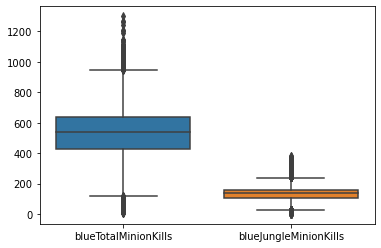

In [11]:
sns.boxplot(data=df[['blueTotalMinionKills', 'blueJungleMinionKills']])

* We checked that there is no option that there are more minion killed in the jungle than in total (total includes the jungle)


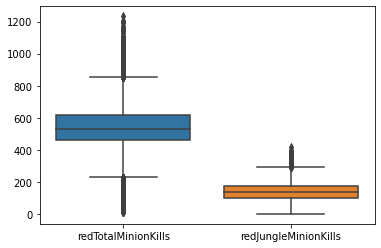

In [12]:
sns.boxplot(data=df[['redTotalMinionKills', 'redJungleMinionKills']])

- We checked that there is no option that there are more ward killed than in ward places in total by the enemy(there cant bo more killed wards than the ones placed)

In [14]:
df = df[df['redWardkills'] <= df['blueWardPlaced']]
df = df[df['blueWardkills'] <= df['redWardPlaced']]

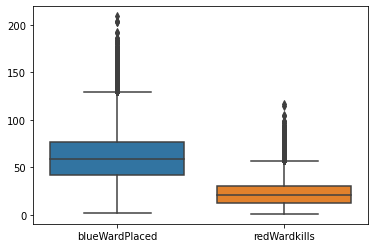

In [15]:
sns.boxplot(data=df[['blueWardPlaced', 'redWardkills']])

- We checked that there is no option that there are more ward killed than in ward places in total by the enemy(there cant bo more killed wards than the ones placed)


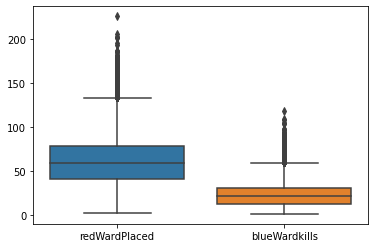

In [16]:
sns.boxplot(data=df[['redWardPlaced', 'blueWardkills']])

- Changing the game duration(seconds) column to be duration in minutes.


In [17]:
df['gameDurationMin'] = (df['gameDuraton'] / 60).astype('int32')
df.drop(['gameDuraton'], axis=1, inplace=True)

- Checking that the length of time for games after the change makes sense and there are no short game shorter than 2 minutes and no longer than an hour.


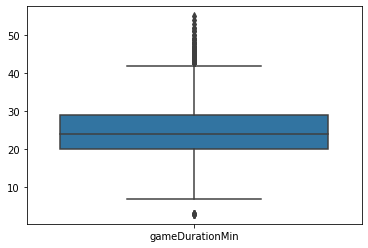

In [18]:
sns.boxplot(data=df[['gameDurationMin']])

* Due to the fact that all of the numerical values should be round to integers (all kills are round and so on the placing...) we will change them to integers.

In [19]:
df['blueWardPlaced'] = df['blueWardPlaced'].astype('int32')
df['blueWardkills'] = df['blueWardkills'].astype('int32')
df['blueTotalMinionKills'] = df['blueTotalMinionKills'].astype('int32')
df['blueJungleMinionKills'] = df['blueJungleMinionKills'].astype('int32')
df['blueTotalHeal'] = df['blueTotalHeal'].astype('int32')
df['redWardPlaced'] = df['redWardPlaced'].astype('int32')
df['redWardkills'] = df['redWardkills'].astype('int32')
df['redTotalMinionKills'] = df['redTotalMinionKills'].astype('int32')
df['redJungleMinionKills'] = df['redJungleMinionKills'].astype('int32')
df['redTotalHeal'] = df['redTotalHeal'].astype('int32')
df.describe(include="all")

,blueWardPlaced,blueWardkills,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal,redWardPlaced,redWardkills,redTotalMinionKills,redJungleMinionKills,redTotalHeal,win,FirstBlood,FirstTower,FirstBaron,FirstDragon,gameDurationMin
count,52167.000000,52167.000000,52167.000000,52167.000000,52167.000000,52167.000000,52167.000000,52167.000000,52167.000000,52167.000000,52167,52167,52167,52167,52167,52167.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Blue,Blue,Red,Red,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26497,26454,27294,42369,32762,NaN
mean,61.181992,22.824755,542.110568,138.804129,24909.125386,61.364272,22.359039,545.660418,142.010141,25053.070696,NaN,NaN,NaN,NaN,NaN,24.419844
std,26.006697,13.829657,147.375951,46.736405,15564.075093,26.242843,13.343502,135.790863,53.897475,11986.076024,NaN,NaN,NaN,NaN,NaN,6.634955
min,2.000000,1.000000,6.000000,1.000000,376.000000,2.000000,1.000000,25.000000,1.000000,414.000000,NaN,NaN,NaN,NaN,NaN,3.000000
25%,42.000000,12.000000,441.000000,112.000000,13907.500000,41.000000,12.000000,472.000000,101.000000,18576.500000,NaN,NaN,NaN,NaN,NaN,20.000000
50%,59.000000,21.000000,542.000000,135.000000,21769.000000,59.000000,21.000000,532.000000,139.000000,24623.000000,NaN,NaN,NaN,NaN,NaN,24.000000
75%,77.000000,31.000000,640.000000,163.000000,32357.000000,78.000000,30.000000,625.000000,178.000000,26399.000000,NaN,NaN,NaN,NaN,NaN,29.000000


### Feature statistical analysis - 
From the describe function data we can see that the std is relativly large in all of numerical features, we can see that in the gameId it is even higher than the mean althoue this information has no real meaning, Due to the fact that it seems that the gameId is not important to the other data we will remove it. On the other numerical features we can see that the std is lower than the mean, but close to it so we will see a big and not 'pretty' spread in the graphs. Also we can see that all of the categorial features contain only two options, 'Red' and 'Blue', By the 'big number rule' that says, when we have a big number of data spread there will be high corresponding to the number of tests and will be good to get result for the ML models. 

We can see that the first corter and the third corter are close to each other in the blueWardPlaced and blueJungleMinionKills and redWardPlaced and redWardkills	and redTotalMinionKills and they are pretty far away from the max values. In general in the numerical values we can see that the max value in most of the features is relativly far away form the third querter which can mean that there may be a more beautiful distribution than we thought, and it is less represented by standard and mean deviation but the majority behave nicely.

### Summary of data fixes - 
Firstly I checked to see if there are duplicated gameId lines, gameId is a unique value so there should not be any duplication in this field, so I deleted every duplicated gameId line.
Secondly I took the dataset and examaned it and saw that amount of NaN values in the data set, for some features is was up to 20% of the amount, so i couldn't just drop those lines.
So I filled the numerical feature NaN lines with the mean values so i can reduce the damage to the data.
Then i checked to see that there are no spelling mistakes in the categorical values and saw that there are no errors.
I checked if the target class (won) has missing values and saw that there are no missing values there, if there were i would have dropped those lines.
Then to deal with the NaN values in the two categorical features(FirstBaron, FirstDragon) I took the top values and inserted them to those features.
Then checked to see that there are really no missing values in the data set.
I checked that there is no chance that the data has some bad arguments(negative via the min func),
and that there is no way that there is no option that there are more minion killed in the jungle than in total (total includes the jungle) for both teams(Red & Blue).
Then check to see that there is no option that there are more ward killed than in ward places in total (there cant bo more killed wards than the ones placed).
Later I transformed all numerical features to become int and changed the seconds to become minutes and checked that the amount of minutes per game is logical.

- Deleted the repeating lines of the gameId in the dataset & rows with zero at red/blueWardPlaced & red/blueWardKills teams ward columns.
- Filled all NaN values in the numerical features to the mean value.
- Checking if we see any spelling mistakes in the calegorial features. Because we don't see any mistakes we can continue and change the NaN values in the categorial features to the top values of each feature so can reduce the damage to the dataset. And we saw that there are no winning values missing so no reason to delete them.
- We know in the categorical values that the two columns with missing values are the FirstBaron and FirstDragon, we will remove line that are missing those two values together(~5K), because we can not understand the data with those missing values.
- Filling all the NaN values in the categorial features to the top value of each feature.
- We dont need the gameId column so we can remove it and instead make it as indexs.
- We checked that there is no option that there are more minion killed in the jungle than in total (total includes the jungle) and if there was we removed them.
- We checked that there is no option that there are more ward killed than in ward places in total by the enemy, if there was we removed them.
- Changing the game duration(seconds) column to be duration in minutes.
- Checking that the length of time for games after the change makes sense and there are no short game shorter than 2 minutes and no longer than hour.
- Changed the numerical values to integers.



Final data set - 


In [20]:
df.to_csv('Data/clean_lol1.csv', index=False)

# Exploratory Data Analysis

### Feature correlation -  
We will check the correlations between the all features, to do so we will use the heatmap and we will need to change all categorical feature to numerical.

In [21]:
df_clean = pd.read_csv('Data/clean_lol1.csv')


In [23]:
corr = df_clean.corr()
corr

,blueWardPlaced,blueWardkills,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal,redWardPlaced,redWardkills,redTotalMinionKills,redJungleMinionKills,redTotalHeal,gameDurationMin
blueWardPlaced,1.000000,0.827279,0.854159,0.666547,0.598750,0.845827,0.878240,0.765804,0.724971,0.505112,0.867050
blueWardkills,0.827279,1.000000,0.820880,0.650430,0.559812,0.901015,0.790226,0.712994,0.652754,0.424706,0.794818
blueTotalMinionKills,0.854159,0.820880,1.000000,0.729696,0.633459,0.846223,0.772916,0.818087,0.763024,0.517290,0.911922
blueJungleMinionKills,0.666547,0.650430,0.729696,1.000000,0.578858,0.642146,0.567258,0.608700,0.460618,0.374047,0.721997
blueTotalHeal,0.598750,0.559812,0.633459,0.578858,1.000000,0.590948,0.487693,0.551195,0.494515,0.419083,0.705653
redWardPlaced,0.845827,0.901015,0.846223,0.642146,0.590948,1.000000,0.811522,0.774121,0.753666,0.511137,0.867720
redWardkills,0.878240,0.790226,0.772916,0.567258,0.487693,0.811522,1.000000,0.725750,0.724280,0.472793,0.781444
redTotalMinionKills,0.765804,0.712994,0.818087,0.608700,0.551195,0.774121,0.725750,1.000000,0.755519,0.493771,0.829099
redJungleMinionKills,0.724971,0.652754,0.763024,0.460618,0.494515,0.753666,0.724280,0.755519,1.000000,0.566472,0.826175
redTotalHeal,0.505112,0.424706,0.517290,0.374047,0.419083,0.511137,0.472793,0.493771,0.566472,1.000000,0.605642


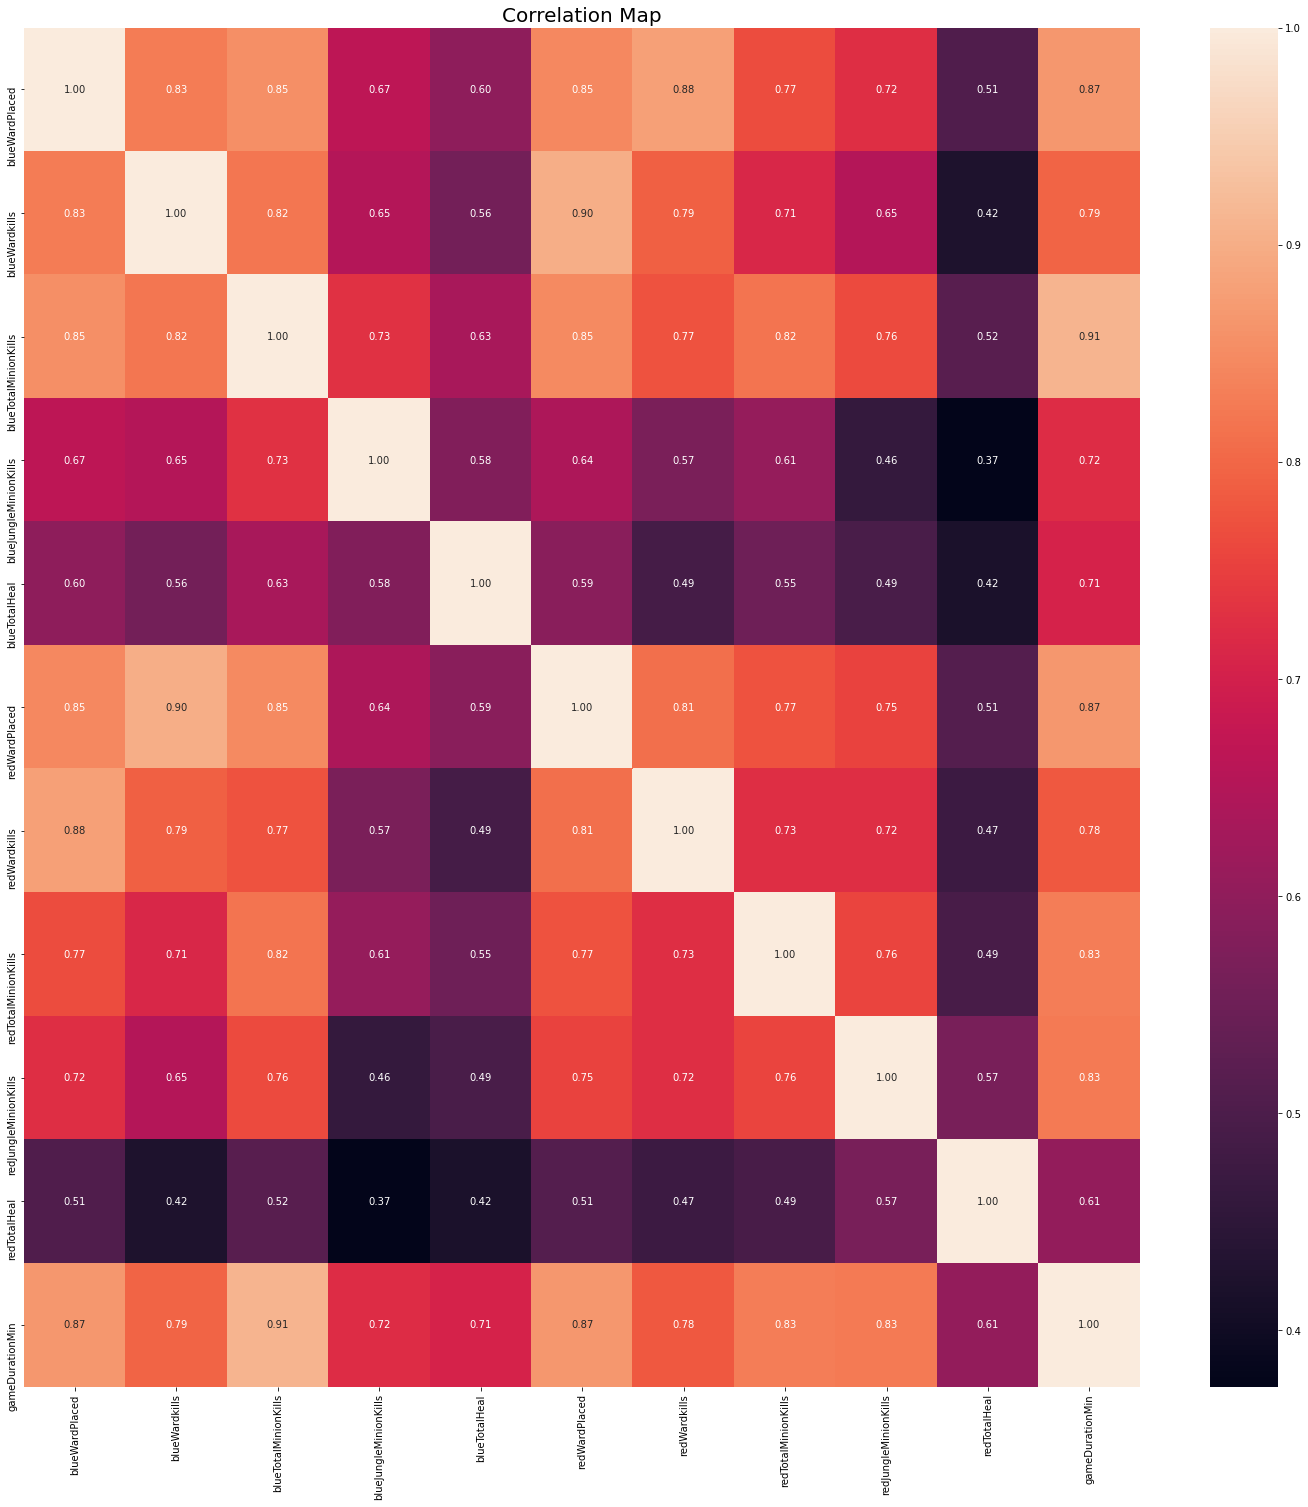

In [24]:
corr = df_clean.corr()
fig, ax = plt.subplots(1, figsize=(25,25))
sns.heatmap(corr, annot=True, fmt=',.2f')
plt.title('Correlation Map', fontsize=20)
plt.show()

##### Here we see that the heatmap of the numeric values have some interesting correlations - 

* Logicly we see that as more red/blueWardPlaced the more red/blueWardKilled - which make sense due to the fact that the more Wards in the field the more the other team can kill them.
* We can see there is a high correlation between blueTotalMinionsKills and gameDurationMin.
* We can see there is a high correlation between blueWardPlaced and redWardPlaced.
* We can see that there is a high correlation between blueWardPlaced and blueTotalMinionsKills.
But with all that we can't realy understand the entire data because we are missing the Target Class and the entire categorial features to build a better image on what is going on in the data.
For that reason we will change the categorial features to be numerical.


In [25]:
# Changing the categorical to numerical with replace the values to be 0 /1 according to the team - 
df_clean['win'].replace({'Blue': 0, 'Red': 1}, inplace=True)
df_clean['FirstBlood'].replace({'Blue': 0, 'Red': 1}, inplace=True)
df_clean['FirstBaron'].replace({'Blue': 0, 'Red': 1}, inplace=True)
df_clean['FirstTower'].replace({'Blue': 0, 'Red': 1}, inplace=True)
df_clean['FirstDragon'].replace({'Blue': 0, 'Red': 1}, inplace=True)
df_clean

,blueWardPlaced,blueWardkills,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal,redWardPlaced,redWardkills,redTotalMinionKills,redJungleMinionKills,redTotalHeal,win,FirstBlood,FirstTower,FirstBaron,FirstDragon,gameDurationMin
0,129,39,774,226,24718,96,56,532,205,65312,1,1,1,1,0,34
1,79,39,613,135,28612,76,28,608,133,27846,0,0,0,1,1,26
2,43,20,486,135,17630,47,19,461,92,24623,0,1,0,1,0,18
3,49,16,509,135,13040,43,17,506,113,17891,0,1,1,1,0,21
4,59,28,678,167,33304,61,21,587,142,24623,0,0,1,1,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52162,100,35,547,193,41259,64,39,580,136,24623,0,0,0,0,1,30
52163,88,40,771,177,23467,99,38,804,209,57739,1,0,1,1,1,32
52164,91,25,640,135,75427,69,39,660,168,24623,0,0,1,1,0,30
52165,126,63,803,251,67496,112,48,789,258,24623,0,0,1,1,1,41


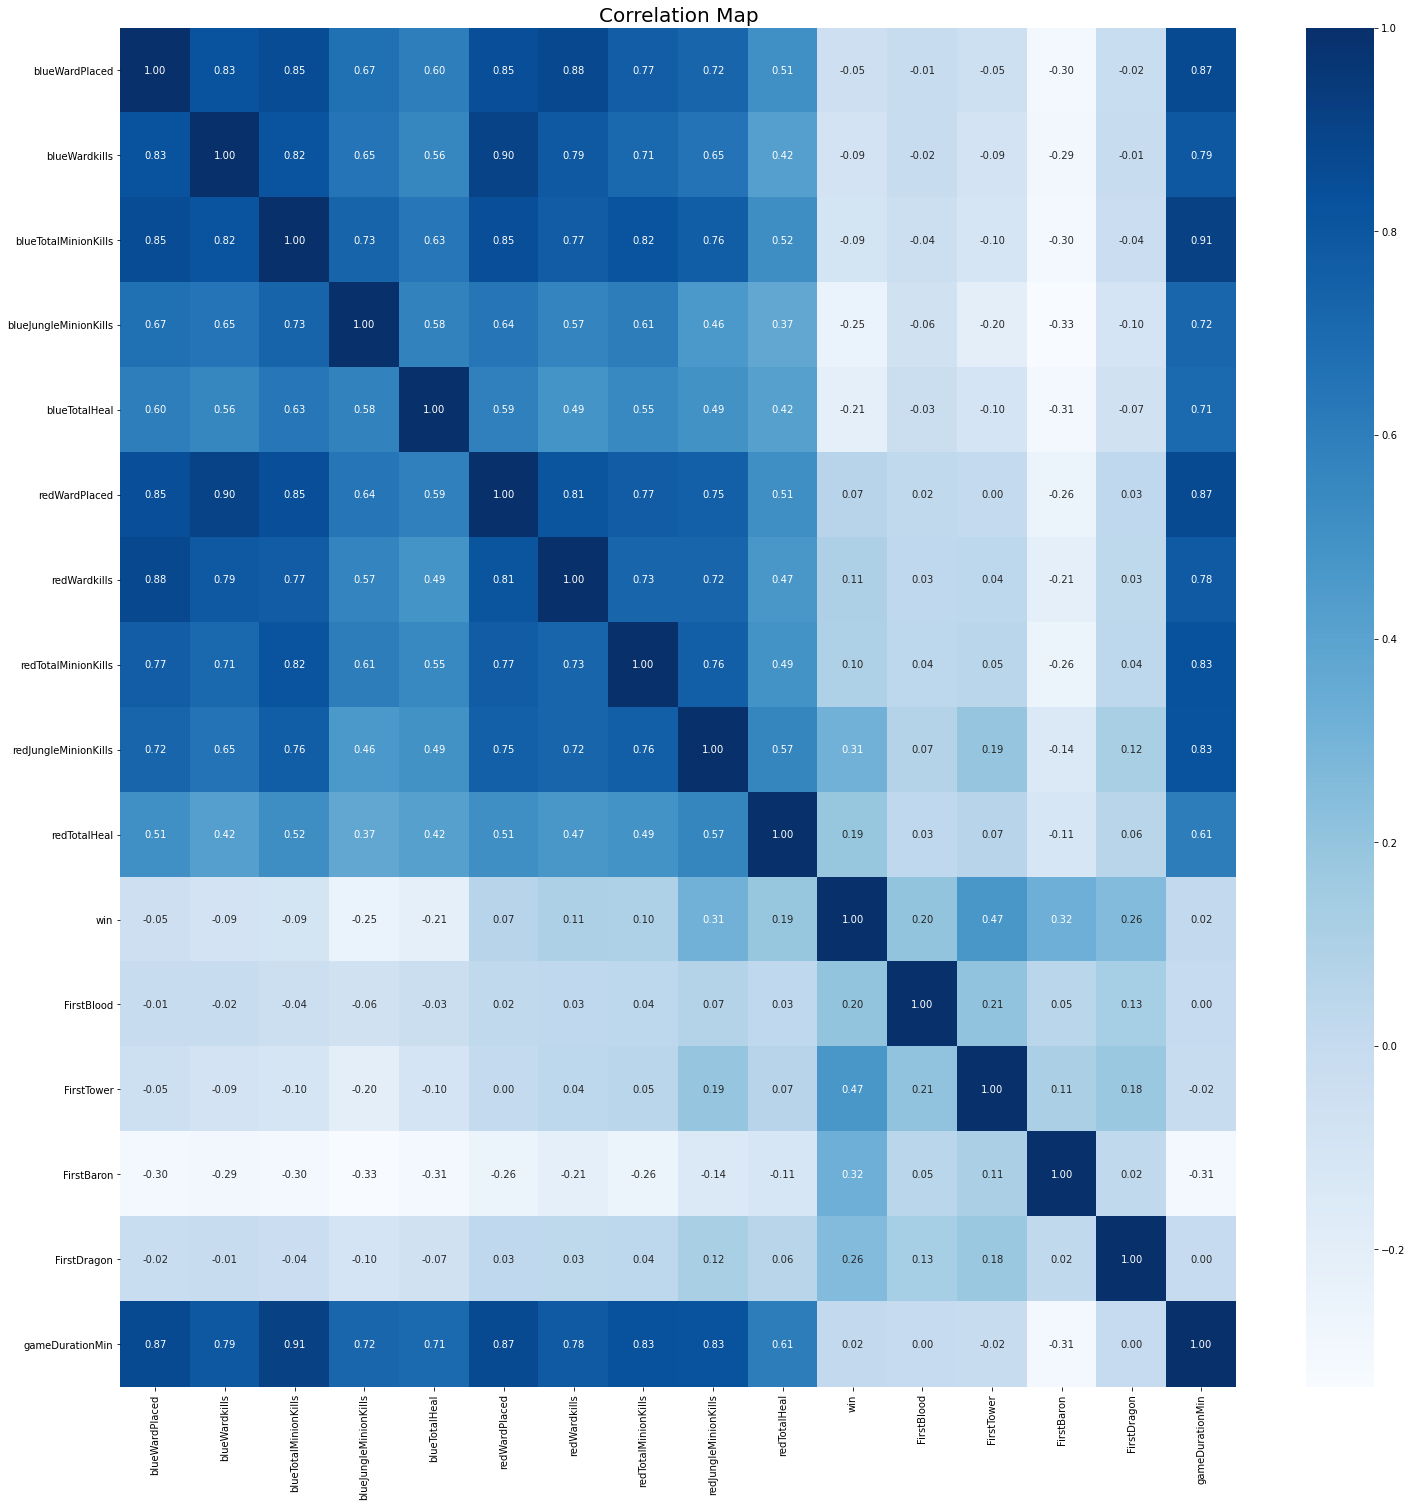

In [116]:
corr = df_clean.corr()
fig, ax = plt.subplots(1, figsize=(25,25))
sns.heatmap(corr, annot=True, fmt=',.2f', cmap='Blues')
plt.title('Correlation Map', fontsize=20)
plt.show()

## Here we see that -
- The higher correlation features between the Target class 'win' are - 
    * FirstTower
    * FirstBaron
    * redjungleMinionKills
    * FirstDragon
    * bluejungleMinionKills

Let's look closly on the corelations and their plots -

In [71]:
df_clean['redJungleMinionKill_Range'] = np.where(df_clean.redJungleMinionKills>=300, '300+', np.where(df_clean.redJungleMinionKills>=200, '200-300', np.where(df_clean.redJungleMinionKills>=100, '100-200', np.where(df_clean.redJungleMinionKills>=0, '0-100', '-0'))))
df_clean.head()

,blueWardPlaced,blueWardkills,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal,redWardPlaced,redWardkills,redTotalMinionKills,redJungleMinionKills,redTotalHeal,win,FirstBlood,FirstTower,FirstBaron,FirstDragon,gameDurationMin,redJungleMinionKill_Range
0,129,39,774,226,24718,96,56,532,205,65312,1,1,1,1,0,34,200-300
1,79,39,613,135,28612,76,28,608,133,27846,0,0,0,1,1,26,100-200
2,43,20,486,135,17630,47,19,461,92,24623,0,1,0,1,0,18,0-100
3,49,16,509,135,13040,43,17,506,113,17891,0,1,1,1,0,21,100-200
4,59,28,678,167,33304,61,21,587,142,24623,0,0,1,1,1,27,100-200


In [74]:
ax1 = df_clean.groupby(['win'])['redJungleMinionKill_Range'].value_counts().unstack()
ax1

redJungleMinionKill_Range,0-100,100-200,200-300,300+
win,,,,
0,8870,14607,2141,52
1,3576,17310,5475,136


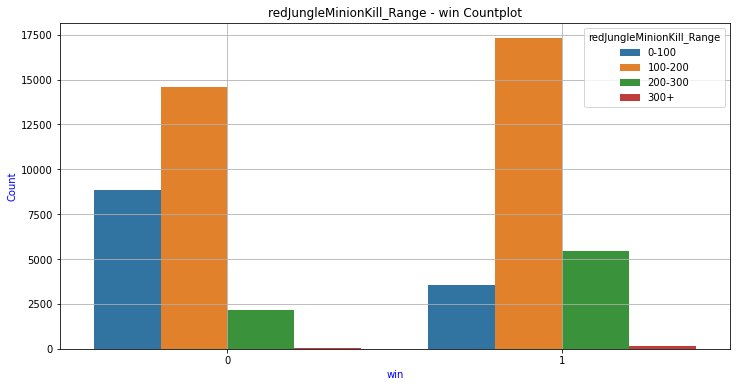

In [105]:
plt.figure(figsize=(12,6))
sns.countplot(x='win', hue='redJungleMinionKill_Range', hue_order=['0-100', '100-200','200-300','300+'], data=df_clean)
plt.title('redJungleMinionKill_Range - win Countplot')
plt.ylabel('Count', color='blue')
plt.xlabel('win', color='blue')
plt.grid(True)
plt.show()

In [76]:
ax2 = df_clean.groupby(['win'])['FirstTower'].value_counts().unstack()
ax2

FirstTower,0,1
win,,
0,19543,6127
1,7751,18746


In [93]:
df_clean['win_colors'] = np.where(df_clean.win==0, 'Blue', np.where(df_clean.win==1, 'Red', '-0'))
df_clean.head(10)

,blueWardPlaced,blueWardkills,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal,redWardPlaced,redWardkills,redTotalMinionKills,redJungleMinionKills,redTotalHeal,win,FirstBlood,FirstTower,FirstBaron,FirstDragon,gameDurationMin,redJungleMinionKill_Range,blueJungleMinionKill_Range,win_colors
0,129,39,774,226,24718,96,56,532,205,65312,1,1,1,1,0,34,200-300,200-300,Red
1,79,39,613,135,28612,76,28,608,133,27846,0,0,0,1,1,26,100-200,100-200,Blue
2,43,20,486,135,17630,47,19,461,92,24623,0,1,0,1,0,18,0-100,100-200,Blue
3,49,16,509,135,13040,43,17,506,113,17891,0,1,1,1,0,21,100-200,100-200,Blue
4,59,28,678,167,33304,61,21,587,142,24623,0,0,1,1,1,27,100-200,100-200,Blue
5,75,54,677,194,29205,87,28,532,198,30483,1,1,0,1,0,31,100-200,100-200,Red
6,45,13,563,119,13059,64,20,510,133,12252,1,1,0,1,1,21,100-200,100-200,Red
7,66,31,651,209,37288,78,16,630,153,17005,0,1,1,0,0,27,100-200,200-300,Blue
8,55,19,511,158,18855,59,28,538,111,23136,1,1,1,1,1,22,100-200,100-200,Red
9,55,26,454,113,15413,55,29,540,125,9494,1,1,1,1,1,20,100-200,100-200,Red


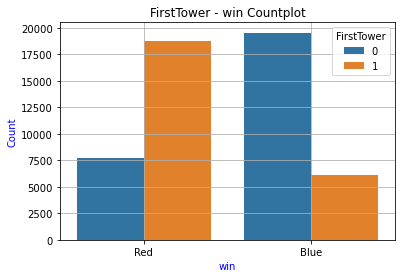

In [98]:
sns.countplot(x='win_colors', hue='FirstTower', data=df_clean)
plt.title('FirstTower - win Countplot')
plt.ylabel('Count', color='blue')
plt.xlabel('win', color='blue')
plt.grid(True)
plt.show()

In [99]:
ax3 = df_clean.groupby(['win'])['FirstBaron'].value_counts().unstack()
ax3

FirstBaron,0,1
win,,
0,8107,17563
1,1691,24806


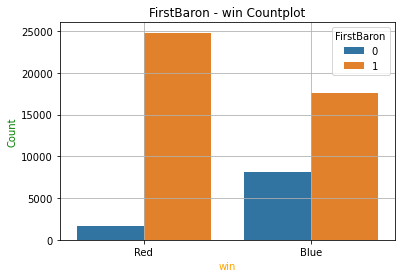

In [101]:
sns.countplot(x='win_colors', hue='FirstBaron', data=df_clean)
plt.title('FirstBaron - win Countplot')
plt.ylabel('Count', color='green')
plt.xlabel('win', color='orange')
plt.grid(True)
plt.show()

In [102]:
ax4 = df_clean.groupby(['win'])['FirstDragon'].value_counts().unstack()
ax4

FirstDragon,0,1
win,,
0,12774,12896
1,6631,19866


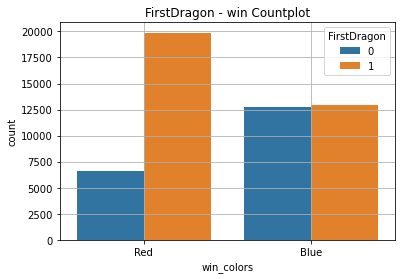

In [104]:
sns.countplot(x='win_colors', hue='FirstDragon', data=df_clean)
plt.title('FirstDragon - win Countplot')
plt.grid(True)
plt.show()

In [77]:
df_clean['blueJungleMinionKill_Range'] = np.where(df_clean.blueJungleMinionKills>=300, '300+', np.where(df_clean.blueJungleMinionKills>=200, '200-300', np.where(df_clean.blueJungleMinionKills>=100, '100-200', np.where(df_clean.blueJungleMinionKills>=0, '0-100', '-0'))))
df_clean.head()

,blueWardPlaced,blueWardkills,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal,redWardPlaced,redWardkills,redTotalMinionKills,redJungleMinionKills,redTotalHeal,win,FirstBlood,FirstTower,FirstBaron,FirstDragon,gameDurationMin,redJungleMinionKill_Range,blueJungleMinionKill_Range
0,129,39,774,226,24718,96,56,532,205,65312,1,1,1,1,0,34,200-300,200-300
1,79,39,613,135,28612,76,28,608,133,27846,0,0,0,1,1,26,100-200,100-200
2,43,20,486,135,17630,47,19,461,92,24623,0,1,0,1,0,18,0-100,100-200
3,49,16,509,135,13040,43,17,506,113,17891,0,1,1,1,0,21,100-200,100-200
4,59,28,678,167,33304,61,21,587,142,24623,0,0,1,1,1,27,100-200,100-200


In [78]:
# check later !!
ax3 = df_clean.groupby(['win'])['blueJungleMinionKill_Range'].value_counts().unstack()
ax3

blueJungleMinionKill_Range,0-100,100-200,200-300,300+
win,,,,
0,2906,19027,3618,119
1,6977,17745,1729,46


### Combined Pivot tables:
We want to check the corelation combined between couple of the features all together to see it we see an ongoing trend.
* win - FirstBlood - FirstTower - FirstBaron


In [53]:
firstTower = df_clean['FirstTower']
firstBaron = df_clean['FirstBaron']
firstBlood = df_clean['FirstBlood']
pivot = df_clean.pivot_table(index=[firstBaron, firstBlood], columns=[firstTower], aggfunc={'win': 'mean'})
print(pivot.unstack())

                 win                              
FirstTower         0                   1          
FirstBlood         0         1         0         1
FirstBaron                                        
0           0.115742  0.138645  0.242931  0.271812
1           0.276456  0.417623  0.784036  0.867105


In [54]:
firstTower = df_clean['FirstTower']
firstBaron = df_clean['FirstBaron']
#firstBlood = df_clean['FirstBlood']
red = pd.cut(df['redJungleMinionKills'], [0, 210, 420])
pivot = df_clean.pivot_table(index=[firstBaron, red], columns=[firstTower], aggfunc={'win': 'mean'})
print(pivot.unstack())

                           win                                
FirstTower                   0                    1           
redJungleMinionKills  (0, 210] (210, 420]  (0, 210] (210, 420]
FirstBaron                                                    
0                     0.125254   0.123023  0.267475   0.290735
1                     0.333535   0.350286  0.835700   0.825421


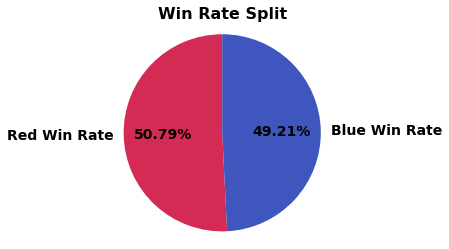

In [35]:
TeamBlue_win = np.sum(df_clean['win'] == 0)
TeamRed_win = np.sum(df_clean['win'] == 1)
TeamRed_win_percent = (TeamRed_win/len(df_clean)) * 100
TeamBlue_win_percent = (TeamBlue_win/len(df_clean)) * 100

plt.pie((TeamRed_win_percent,TeamBlue_win_percent), labels = ('Red Win Rate', 'Blue Win Rate'), startangle = 90, autopct='%.2f%%',colors=('#D42B55','#4056BF')
        ,textprops={'fontsize': 14,'color':'black','weight': 'bold'})

plt.axis('equal')
plt.title('Win Rate Split',weight='bold',fontsize=16)
plt.show()

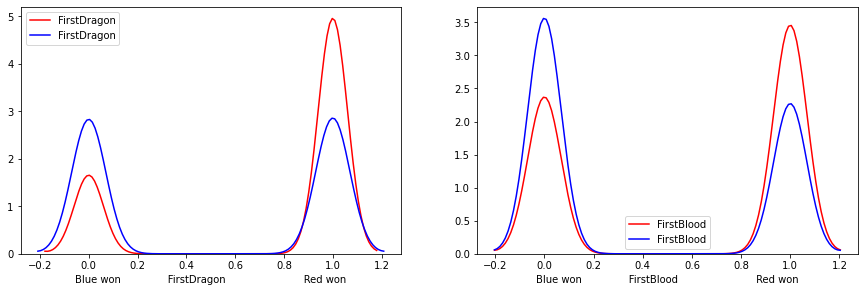

In [91]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.kdeplot((df_clean['FirstDragon'][df_clean['win'] == 1]), color='red')
sns.kdeplot((df_clean['FirstDragon'][df_clean['win'] == 0]), color='blue')
plt.xlabel('Blue won               FirstDragon                         Red won')

plt.subplot(2, 2, 2)
sns.kdeplot((df_clean['FirstBlood'][df_clean['win'] == 1]), color='red')
sns.kdeplot((df_clean['FirstBlood'][df_clean['win'] == 0]), color='blue')
plt.xlabel('Blue won               FirstBlood                         Red won')

plt.show()

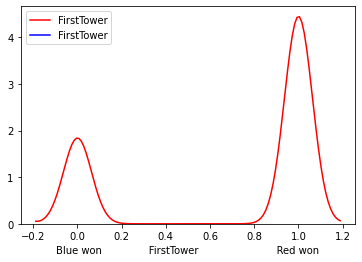

In [51]:
sns.kdeplot((df_clean['FirstTower'][df_clean['win'] == 1]), color='red')
sns.kdeplot((df_clean['FirstTower'][df_clean['win'] == 0]), color='blue')
plt.xlabel('Blue won               FirstTower                         Red won')
plt.show()

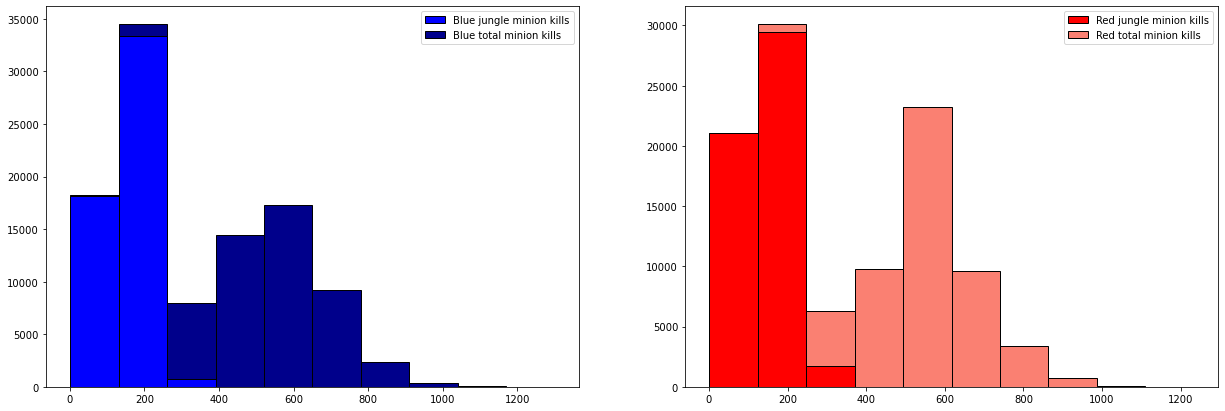

In [65]:
plt.figure(figsize=(21,7))
plt.subplot(1,2,1)
plt.hist([df.blueJungleMinionKills,df.blueTotalMinionKills], stacked=True, ec="k",color=["blue", "darkblue"])
labels= ["Blue jungle minion kills","Blue total minion kills"]
plt.legend(labels)
plt.subplot(1,2,2)
plt.hist([df.redJungleMinionKills,df.redTotalMinionKills], stacked=True, ec="k",color=["red", "salmon"])
labels= ["Red jungle minion kills","Red total minion kills"]
plt.legend(labels)
plt.show()